In [1]:
import yaml
import pandas as pd
import numpy as np
import os
import scipy.stats
import collections
import matplotlib.pyplot as plt

pd.set_option("display.min_rows", 50)

Read the cross validation and baseline dataframes

In [3]:
df1 = pd.read_csv(os.path.join(os.getenv("DATA_DIR"),
                               "mica_text_coref/movie_coref/results/coreference/cross_val_1.csv"), index_col=None)
df2 = pd.read_csv(os.path.join(os.getenv("DATA_DIR"),
                               "mica_text_coref/movie_coref/results/coreference/cross_val_2.csv"), index_col=None)
df3 = pd.read_csv(os.path.join(os.getenv("DATA_DIR"),
                               "mica_text_coref/movie_coref/results/coreference/cross_val_4.csv"), index_col=None)
df4 = pd.read_csv(os.path.join(os.getenv("DATA_DIR"),
                               "mica_text_coref/movie_coref/results/coreference/cross_val_5.csv"), index_col=None)
df5 = pd.read_csv(os.path.join(os.getenv("DATA_DIR"),
                               "mica_text_coref/movie_coref/results/coreference/cross_val_6.csv"), index_col=None)
bl = pd.read_csv(os.path.join(os.getenv("DATA_DIR"),
                              "mica_text_coref/movie_coref/results/coreference/full_length.baseline.tsv"), sep="\t",
                              index_col=None)

print("df1")
for col, dtype in zip(df1.columns, df1.dtypes):
    print(f"{col} ({dtype})", end=", ")
print()

print("df2")
for col, dtype in zip(df2.columns, df2.dtypes):
    print(f"{col} ({dtype})", end=", ")
print()

print("df3")
for col, dtype in zip(df3.columns, df3.dtypes):
    print(f"{col} ({dtype})", end=", ")
print()

print("df4")
for col, dtype in zip(df4.columns, df4.dtypes):
    print(f"{col} ({dtype})", end=", ")
print()

print("df5")
for col, dtype in zip(df5.columns, df5.dtypes):
    print(f"{col} ({dtype})", end=", ")
print()

print("bl")
for col, dtype in zip(bl.columns, bl.dtypes):
    print(f"{col} ({dtype})", end=", ")

df1
preprocess (object), bert_lr (float64), model_lr (float64), warmup (float64), movie (object), dev_lea (float64), train_lea (float64), best_epoch (int64), dev_scores (object), train_scores (object), 
df2
weight_decay (float64), dropout (float64), movie (object), dev_lea (float64), best_epoch (int64), dev_scores (object), 
df3
dev_document_len (int64), dev_overlap_len (int64), movie (object), dev_lea (float64), best_epoch (int64), dev_scores (object), 
df4
dev_document_len (int64), repk (int64), movie (object), dev_lea (float64), best_epoch (int64), dev_scores (object), dev_gpu_memory (float64), 
df5
dev_document_len (int64), dev_overlap_len (int64), merge_strategy (object), load_bert (bool), freeze_bert (bool), add_cr_to_coarse (bool), filter_by_cr (bool), remove_singleton (bool), movie (object), dev_lea (float64), best_epoch (int64), 
bl
preprocess (object), genre (object), split_len (int64), overlap_len (int64), merge_strategy (object), merge_speakers (bool), entity (object), remo

Find the macro scores (averaged across movies)

In [4]:
print("macro average df1:")
macro_df1 = (df1.groupby(["preprocess", "bert_lr", "model_lr", "warmup"])
            .agg({"dev_lea": "mean", "best_epoch": "mean", "movie": "count"})
            .sort_values(by="dev_lea", ascending=False))
macro_df1 = macro_df1.loc[macro_df1["movie"] == 6]
print(macro_df1.shape)
display(macro_df1.head(10))
print()

print("macro average df2:")
macro_df2 = (df2.groupby(["weight_decay", "dropout"])
            .agg({"dev_lea": "mean", "best_epoch": "mean", "movie": "count"})
            .sort_values(by="dev_lea", ascending=False))
macro_df2 = macro_df2.loc[macro_df2["movie"] == 6]
print(macro_df2.shape)
display(macro_df2.head(10))
print()

print("macro average df3:")
macro_df3 = (df3.groupby(["dev_document_len", "dev_overlap_len"])
            .agg({"dev_lea": "mean", "best_epoch": "mean", "movie": "count"})
            .sort_values(by="dev_lea", ascending=False))
macro_df3 = macro_df3.loc[macro_df3["movie"] == 6]
print(macro_df3.shape)
display(macro_df3.head(10))
print()

print("macro average df4:")
macro_df4 = (df4.groupby(["dev_document_len", "repk"])
            .agg({"dev_lea": "mean", "best_epoch": "mean", "movie": "count", "dev_gpu_memory": "mean"})
            .sort_values(by="dev_lea", ascending=False))
macro_df4 = macro_df4.loc[macro_df4["movie"] == 6]
print(macro_df4.shape)
display(macro_df4.head(10))
print()

print("macro average df5:")
macro_df5 = (df5.groupby(["dev_document_len", "dev_overlap_len", "load_bert", "freeze_bert",
                          "add_cr_to_coarse", "filter_by_cr", "remove_singleton", "merge_strategy"])
            .agg({"dev_lea": "mean", "best_epoch": "mean", "movie": "count"})
            .sort_values(by="dev_lea", ascending=False))
macro_df5 = macro_df5.loc[macro_df5["movie"] == 6]
print(macro_df5.shape)
display(macro_df5.head(10))
print()

print("macro average bl:")
bl_ = bl.loc[(bl["movie"] != "all") & ~bl["remove_gold_singletons"] & ~bl["provide_gold_mentions"]
             & (bl["metric"] == "lea")]
macro_bl = (bl_.groupby(["preprocess", "genre", "split_len", "overlap_len", "merge_strategy", "merge_speakers",
                        "entity"])
            .agg({"F": "mean", "movie": "count"})
            .sort_values(by="F", ascending=False))
macro_bl = macro_bl.loc[(macro_bl["movie"] == 6)]
print(macro_bl.shape)
display(macro_bl.head(10))

macro average df1:
(108, 3)


dev_lea  best_epoch  movie
preprocess bert_lr model_lr warmup                              
regular    0.00002 0.0002    50.0   61.600000    6.833333      6
addsays    0.00002 0.0001   -1.0    61.592167    6.333333      6
           0.00001 0.0002   -1.0    61.572500    8.166667      6
regular    0.00002 0.0002    100.0  61.405833    8.166667      6
addsays    0.00002 0.0002    50.0   61.316833    5.666667      6
                   0.0001    0.0    61.287667    7.166667      6
regular    0.00005 0.0002    50.0   61.252167    7.666667      6
addsays    0.00002 0.0005   -1.0    61.202667    6.833333      6
           0.00005 0.0001    50.0   60.993833   11.500000      6
regular    0.00002 0.0005    0.0    60.984667    7.000000      6


macro average df2:
(40, 3)


dev_lea  best_epoch  movie
weight_decay dropout                              
0.0010       0.0      61.600000    6.833333      6
0.0100       0.0      61.085833   11.000000      6
1.0000       0.0      61.080167    8.333333      6
0.1000       0.0      60.119500    6.666667      6
0.0001       0.0      59.836667    5.666667      6
0.0000       0.0      59.836667    5.666667      6
10.0000      0.0      59.632000    7.166667      6
             0.2      58.728167    8.000000      6
0.1000       0.2      57.957000    3.833333      6
1.0000       0.2      57.753333    5.166667      6


macro average df3:
(44, 3)


dev_lea  best_epoch  movie
dev_document_len dev_overlap_len                              
10240            4096             79.530167    7.666667      6
20480            4096             79.503500    8.333333      6
                 5120             79.380667    8.000000      6
                 3072             79.197833    7.500000      6
10240            3072             78.889333    7.666667      6
20480            2048             78.874833    8.666667      6
8192             3072             77.310667    6.666667      6
20480            1024             77.163167    9.333333      6
10240            2048             76.955833   10.500000      6
8192             2048             76.658000    8.166667      6


macro average df4:
(25, 4)


dev_lea  best_epoch  movie  dev_gpu_memory
dev_document_len repk                                              
8192             4     78.637500   11.166667      6       15.931667
20480            3     77.426167    9.833333      6       14.310000
                 4     77.321500   11.000000      6       14.620000
10240            3     76.504500   11.666667      6       11.088333
20480            2     76.242833   10.333333      6       14.260000
5120             4     76.150333    8.833333      6       17.981667
20480            1     76.098000   11.500000      6       14.260000
8192             2     75.237000   10.166667      6        9.856667
10240            4     73.882167    7.166667      6       15.296667
8192             3     72.879167    8.833333      6       13.080000


macro average df5:
(55, 3)


dev_lea  \
dev_document_len dev_overlap_len load_bert freeze_bert add_cr_to_coarse filter_by_cr remove_singleton merge_strategy              
8192             3072            True      False       True             False        True             none            76.581667   
                                                                        True         True             avg             76.556500   
                                                                        False        True             avg             76.387500   
                                                                                                      max             75.843500   
                                                       False            False        True             avg             75.785667   
                                                       True             False        True             pre             75.747667   
                                                                                                      post            75.733333   
                 2048            True      False       False            False        True             avg             75.703167   
                                                       True             False        True             post            75.612833   
                 3072            True      False       True             False        True             min             75.568167   

                                                                                                                      best_epoch  \
dev_document_len dev_overlap_len load_bert freeze_bert add_cr_to_coarse filter_by_cr remove_singleton merge_strategy               
8192             3072            True      False       True             False        True             none              9.000000   
                                                                        True         True             avg               8.833333   
                                                                        False        True             avg               8.833333   
                                                                                                      max               6.833333   
                                                       False            False        True             avg               8.166667   
                                                       True             False        True             pre               7.000000   
                                                                                                      post              7.000000   
                 2048            True      False       False            False        True             avg               7.666667   
                                                       True             False        True             post              7.833333   
                 3072            True      False       True             False        True             min               7.333333   

                                                                                                                      movie  
dev_document_len dev_overlap_len load_bert freeze_bert add_cr_to_coarse filter_by_cr remove_singleton merge_strategy         
8192             3072            True      False       True             False        True             none                6  
                                                                        True         True             avg                 6  
                                                                        False        True             avg                 6  
                                                                                                      max                 6  
                                                       False            False        True             avg                 6  
                                                       True             False   


macro average bl:
(9072, 2)


F  \
preprocess genre split_len overlap_len merge_strategy merge_speakers entity               
addsays    wb    3072      512         avg            True           speaker  59.432041   
                                       min            True           speaker  59.413063   
                                       post           True           speaker  59.381315   
                 5120      128         none           True           speaker  59.241314   
           tc    3072      512         avg            True           speaker  59.165600   
           mz    5120      128         none           True           speaker  59.056600   
           tc    3072      512         post           True           speaker  59.033369   
           wb    5120      128         max            True           speaker  58.976455   
                 3072      512         max            True           speaker  58.968410   
                 5120      128         avg            True           speaker  58.966080   

                                                                              movie  
preprocess genre split_len overlap_len merge_strategy merge_speakers entity          
addsays    wb    3072      512         avg            True           speaker      6  
                                       min            True           speaker      6  
                                       post           True           speaker      6  
                 5120      128         none           True           speaker      6  
           tc    3072      512         avg            True           speaker      6  
           mz    5120      128         none           True           speaker      6  
           tc    3072      512         post           True           speaker      6  
           wb    5120      128         max            True           speaker      6  
                 3072      512         max            True           speaker      6  
                 5120      128         avg            True           speaker      6

Plot dev lea for different document document lens and overlap lens

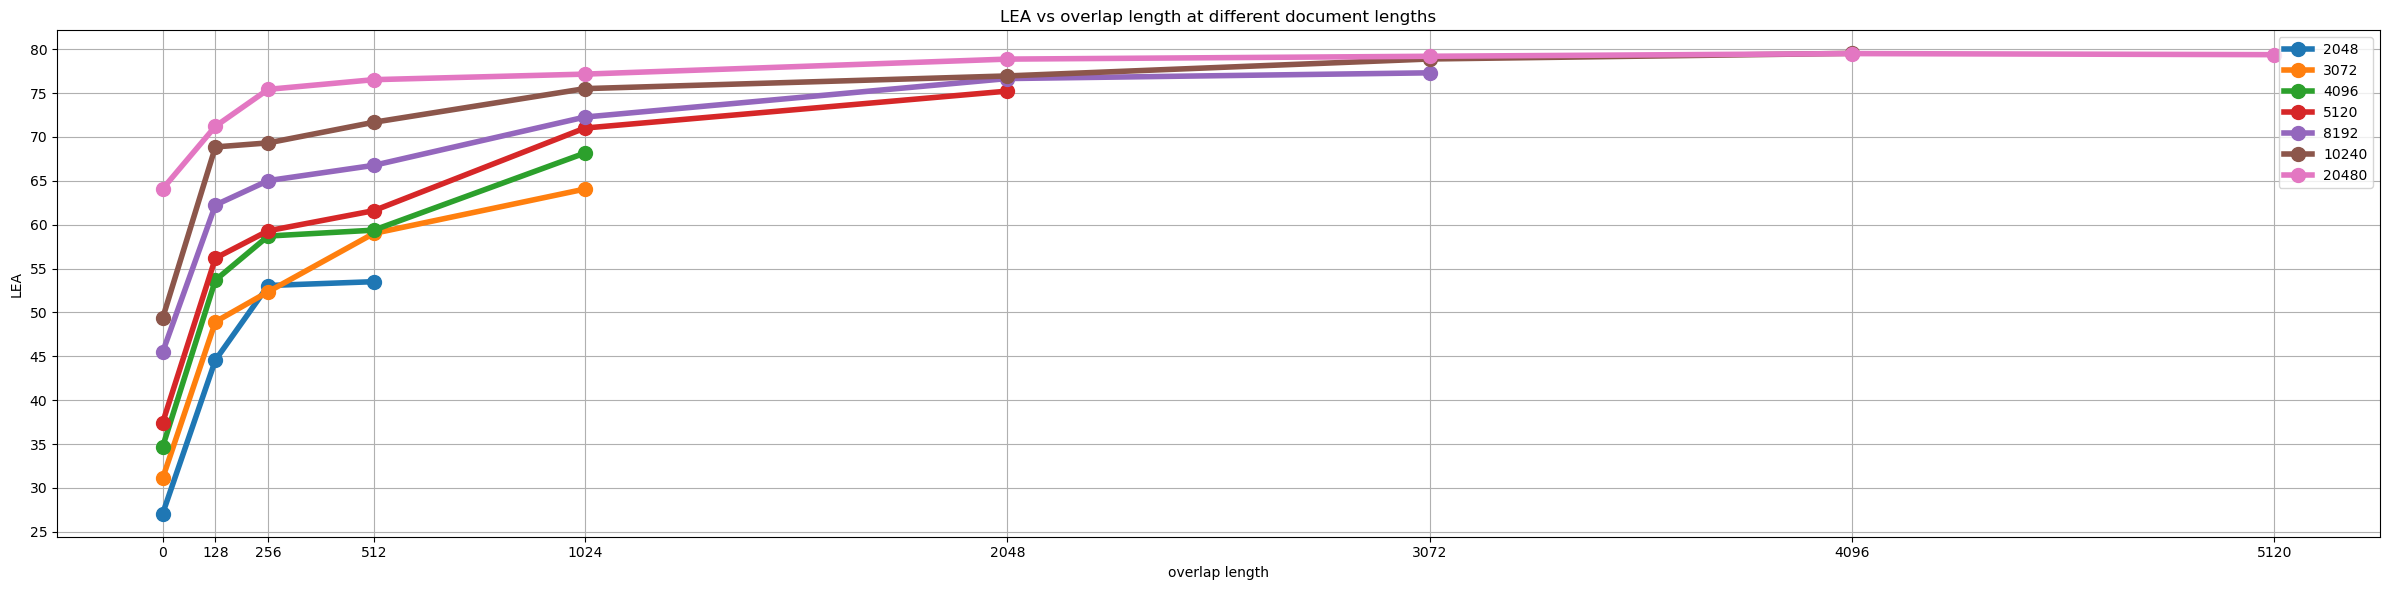

In [4]:
df_ = macro_df3.reset_index()
plt.figure(figsize=(24, 6))
for document_len, df__ in df_.groupby("dev_document_len"):
    df__ = df__.sort_values(by="dev_overlap_len", ascending=True)
    overlap_lens = df__["dev_overlap_len"].tolist()
    scores = df__["dev_lea"].tolist()
    plt.plot(overlap_lens, scores, label=str(document_len), lw=4, marker=".", markersize=20)
plt.xlabel("overlap length")
plt.ylabel("LEA")
plt.xticks(ticks=[0, 128, 256, 512, 1024, 2048, 3072, 4096, 5120])
plt.yticks(ticks=[25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80])
plt.title("LEA vs overlap length at different document lengths")
plt.legend()
plt.tight_layout()
plt.grid(visible=True, which="both")
plt.show()

In [5]:
df3.loc[(df3["dev_document_len"] == 20480) & (df3["dev_overlap_len"] == 1024)].sort_values(by="movie")

,dev_document_len,dev_overlap_len,movie,dev_lea,best_epoch,dev_scores
111,20480,1024,avengers_endgame,57.756,8,"[51.584, 53.3672, 51.4475, 54.8695, 53.0705, 5..."
71,20480,1024,dead_poets_society,80.624,6,"[55.0021, 72.1688, 70.1121, 64.728, 75.5696, 8..."
13,20480,1024,john_wick,83.802,10,"[68.1938, 72.909, 79.8273, 81.4043, 81.7847, 7..."
185,20480,1024,prestige,75.325,3,"[70.6964, 72.4374, 75.3249, 75.2531, 67.9563, ..."
64,20480,1024,quiet_place,85.872,14,"[65.7963, 68.6753, 64.54, 76.9486, 77.7601, 74..."
172,20480,1024,zootopia,79.600,15,"[70.9066, 73.8026, 73.9908, 74.7188, 77.4368, ..."


In [6]:
df3.loc[(df3["dev_document_len"] == 5120) & (df3["dev_overlap_len"] == 2048)].sort_values(by="movie")

,dev_document_len,dev_overlap_len,movie,dev_lea,best_epoch,dev_scores
240,5120,2048,avengers_endgame,61.099,6,"[47.0113, 49.8996, 49.2513, 51.3355, 53.4044, ..."
231,5120,2048,dead_poets_society,71.839,6,"[45.6969, 60.2393, 66.2537, 64.5423, 66.3541, ..."
226,5120,2048,john_wick,82.219,15,"[69.2355, 73.3531, 78.0478, 79.9631, 78.9058, ..."
244,5120,2048,prestige,74.583,3,"[60.7617, 63.0549, 74.5835, 74.0211, 69.1432, ..."
208,5120,2048,quiet_place,85.959,10,"[68.4333, 72.0559, 67.3808, 80.0417, 77.465, 7..."
242,5120,2048,zootopia,75.665,20,"[69.8173, 70.1177, 69.4761, 70.4887, 74.232, 7..."


In [8]:
macro_df3.sort_index()

dev_lea  best_epoch  movie
dev_document_len dev_overlap_len                              
2048             0                27.060167    8.333333      6
                 128              44.569333    9.166667      6
                 256              53.068000    9.666667      6
                 512              53.505833    9.166667      6
3072             0                31.091667    9.833333      6
                 128              48.938833   10.333333      6
                 256              52.359000    9.000000      6
                 512              59.007333    8.000000      6
                 1024             64.063500    6.333333      6
4096             0                34.681167    9.000000      6
                 128              53.680500    5.833333      6
                 256              58.706500   11.166667      6
                 512              59.379000    6.666667      6
                 1024             68.168833    8.666667      6
5120             0                37.424833    8.000000      6
                 128              56.189000    8.166667      6
                 256              59.306500    8.500000      6
                 512              61.600000    6.833333      6
                 1024             71.015667    8.666667      6
                 2048             75.227333   10.000000      6
8192             0                45.476500    8.166667      6
                 128              62.244833    8.333333      6
                 256              65.024500    6.833333      6
                 512              66.765167    7.500000      6
                 1024             72.270167    8.000000      6
                 2048             76.658000    8.166667      6
                 3072             77.310667    6.666667      6
10240            0                49.342167    8.500000      6
                 128              68.863500    9.500000      6
                 256              69.325500    8.500000      6
                 512              71.674333    7.833333      6
                 1024             75.509333    6.166667      6
                 2048             76.955833   10.500000      6
                 3072             78.889333    7.666667      6
                 4096             79.530167    7.666667      6
20480            0                64.084167    9.666667      6
                 128              71.217000    9.333333      6
                 256              75.427500    7.333333      6
                 512              76.531000    8.833333      6
                 1024             77.163167    9.333333      6
                 2048             78.874833    8.666667      6
                 3072             79.197833    7.500000      6
                 4096             79.503500    8.333333      6
                 5120             79.380667    8.000000      6

Plot dev lea for different document lengths and repk in the hierarchical model

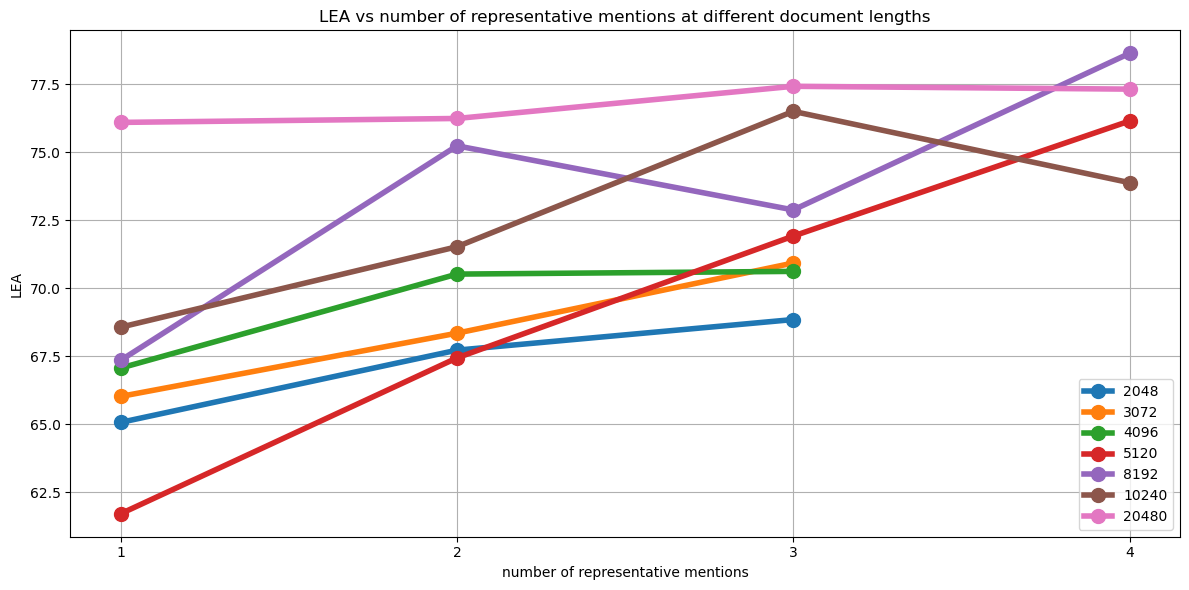

In [5]:
df_ = macro_df4.reset_index()
plt.figure(figsize=(12, 6))
for document_len, df__ in df_.groupby("dev_document_len"):
    df__ = df__.sort_values(by="repk", ascending=True)
    repks = df__["repk"].tolist()
    scores = df__["dev_lea"].tolist()
    plt.plot(repks, scores, label=str(document_len), lw=4, marker=".", markersize=20)
plt.xlabel("number of representative mentions")
plt.ylabel("LEA")
plt.xticks(ticks=[1, 2, 3, 4])
plt.title("LEA vs number of representative mentions at different document lengths")
plt.legend()
plt.tight_layout()
plt.grid(visible=True, which="both")
plt.show()

In [7]:
macro_df4.sort_index()

dev_lea  best_epoch  movie  dev_gpu_memory
dev_document_len repk                                              
2048             1     65.067333    9.333333      6        8.860000
                 2     67.722833    8.000000      6       12.940000
                 3     68.848333    7.833333      6       19.486667
3072             1     66.021500    7.666667      6        8.533333
                 2     68.347333    9.000000      6       11.503333
                 3     70.927333    8.666667      6       16.506667
4096             1     67.065333    9.166667      6        8.381667
                 2     70.519833   10.500000      6       10.873333
                 3     70.619833    7.500000      6       15.518333
5120             1     61.708500    6.166667      6        8.405000
                 2     67.438500    8.000000      6       10.375000
                 3     71.918167    7.666667      6       13.848333
                 4     76.150333    8.833333      6       17.981667
8192             1     67.349833    5.166667      6        8.428333
                 2     75.237000   10.166667      6        9.856667
                 3     72.879167    8.833333      6       13.080000
                 4     78.637500   11.166667      6       15.931667
10240            1     68.568333    8.833333      6        9.133333
                 2     71.526000    8.333333      6        9.670000
                 3     76.504500   11.666667      6       11.088333
                 4     73.882167    7.166667      6       15.296667
20480            1     76.098000   11.500000      6       14.260000
                 2     76.242833   10.333333      6       14.260000
                 3     77.426167    9.833333      6       14.310000
                 4     77.321500   11.000000      6       14.620000

Variation for less important hyperparam

In [6]:
df_ = macro_df5.reset_index()
df_[(df_["dev_document_len"] == 5120) & (df_["dev_overlap_len"] == 512)]

,dev_document_len,dev_overlap_len,load_bert,freeze_bert,add_cr_to_coarse,filter_by_cr,remove_singleton,merge_strategy,dev_lea,best_epoch,movie
40,5120,512,True,False,True,True,True,avg,60.697167,10.166667,6
41,5120,512,True,False,True,False,True,avg,60.682000,10.166667,6
42,5120,512,True,False,True,False,True,max,60.500333,10.333333,6
43,5120,512,True,False,True,False,True,pre,60.295333,9.166667,6
44,5120,512,True,False,False,False,True,avg,60.170500,7.000000,6
45,5120,512,True,False,True,False,True,none,60.016500,7.166667,6
46,5120,512,True,False,True,False,True,post,59.878000,6.666667,6
47,5120,512,True,False,True,False,True,min,59.871833,6.666667,6
48,5120,512,False,False,True,False,True,avg,54.886167,18.333333,6
49,5120,512,True,True,True,False,True,avg,54.464500,11.333333,6
